In [9]:
from utils import *

In [17]:
root_dir = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/'
fp1 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1'
fp2 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_2'
file_path1 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1/acc_00002.csv'
file_path2 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_2/acc_00002.csv'

file_path_len1 = folder_total_len(fp1)
print(file_path_len1)
file_path_len2 = folder_total_len(fp2)
print(file_path_len2)

2803
871


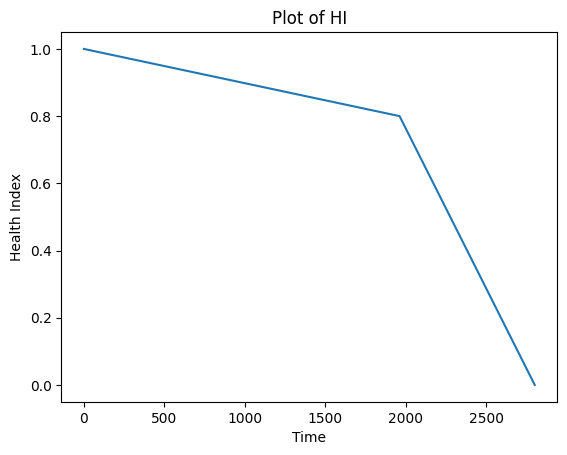

1962
841
2803


In [24]:
tp = 0.8
slp = 0.7
hi = two_stage_hi(tp, slp, file_path_len2, True)
len1 = int(file_path_len1 * slp)
print(len1)

len2 = file_path_len1 - len1
print(len2)

print(len1 + len2)

In [25]:
sep_point = int(file_path_len1 * slp)

hi1 = hi[:sep_point]
print(len(hi1))
print(hi1)

1962
[1.         0.99989801 0.99979602 ... 0.80020398 0.80010199 0.8       ]


In [28]:
hi2 = hi[sep_point:]
print(len(hi2))
print(hi2)

841
[0.8        0.79904762 0.79809524 0.79714286 0.79619048 0.7952381
 0.79428571 0.79333333 0.79238095 0.79142857 0.79047619 0.78952381
 0.78857143 0.78761905 0.78666667 0.78571429 0.7847619  0.78380952
 0.78285714 0.78190476 0.78095238 0.78       0.77904762 0.77809524
 0.77714286 0.77619048 0.7752381  0.77428571 0.77333333 0.77238095
 0.77142857 0.77047619 0.76952381 0.76857143 0.76761905 0.76666667
 0.76571429 0.7647619  0.76380952 0.76285714 0.76190476 0.76095238
 0.76       0.75904762 0.75809524 0.75714286 0.75619048 0.7552381
 0.75428571 0.75333333 0.75238095 0.75142857 0.75047619 0.74952381
 0.74857143 0.74761905 0.74666667 0.74571429 0.7447619  0.74380952
 0.74285714 0.74190476 0.74095238 0.74       0.73904762 0.73809524
 0.73714286 0.73619048 0.7352381  0.73428571 0.73333333 0.73238095
 0.73142857 0.73047619 0.72952381 0.72857143 0.72761905 0.72666667
 0.72571429 0.7247619  0.72380952 0.72285714 0.72190476 0.72095238
 0.72       0.71904762 0.71809524 0.71714286 0.71619048 0.71

In [33]:
from dataset_2stage import CustomDataSet_2stage

Learning_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set'
Validation_set = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Validation_set'
work_condition = 1
acquire_part = 1
train_vali = [Learning_set, Validation_set, 3]
sX = [100, 32, 64, 16, 32, 32, 3, 1, 50, 64, 30, 80, 70]

train_data_list = CustomDataSet_2stage(Learning_set, work_condition, acquire_part, transform=None, mode='train', label_style=2, two_stage_hp=[sX[11]/100, sX[12]/100]).get_file_paths()
train_data = CustomDataSet_2stage(Learning_set, work_condition, acquire_part, transform=None, mode='train', label_style=2, two_stage_hp=[sX[11]/100, sX[12]/100])

In [35]:
file_p = train_data_list[0]
file_p

'/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1/acc_01836.csv'

In [36]:
len(train_data)

2571

In [9]:
hi_part1 = []
hi_part2 = []

for i in range(10):
    if train_data[i][1] > sX[11]/100:
        hi_part1.append(train_data[i])
    else:
        hi_part2.append(train_data[i])

In [10]:
hi_part1

[(tensor([[ 0.0023,  0.0908,  0.0684,  ..., -0.0699, -0.0247, -0.2295]]),
  tensor(0.8129)),
 (tensor([[-0.1145,  0.1813,  0.1845,  ...,  0.1031, -0.2147, -0.0485]]),
  tensor(0.9699)),
 (tensor([[0.2362, 0.0035, 0.3642,  ..., 0.2239, 0.0782, 0.1484]]),
  tensor(0.8789)),
 (tensor([[ 0.0987, -0.0434, -0.3244,  ..., -0.0053,  0.2310,  0.4990]]),
  tensor(0.9713)),
 (tensor([[-0.2660,  0.2039,  0.1010,  ...,  0.1593,  0.2295,  0.1607]]),
  tensor(0.8143)),
 (tensor([[ 0.0437,  0.1540, -0.0284,  ...,  0.2406,  0.4425,  0.1498]]),
  tensor(0.9457)),
 (tensor([[0.1889, 0.1940, 0.0940,  ..., 0.6784, 0.3577, 0.2788]]),
  tensor(0.9741))]

In [61]:
def get_file_paths(root_dir, work_condition, mode='train'):
    file_paths = []
    if mode == 'train':
        wk = 'Bearing'
        wk = wk + str(work_condition)
        for folder in os.listdir(root_dir):
            if wk in folder:
                folder_path = os.path.join(root_dir, folder)
                if os.path.isdir(folder_path):
                    for filename in os.listdir(folder_path):
                        if filename.endswith('.csv'):
                            pathes = os.path.join(folder_path, filename)
                            pathes = os.path.normpath(pathes)
                            file_paths.append(pathes)
    
    elif mode == 'test':
        for files in os.listdir(root_dir):
            if files.endswith('.csv'):
                pathes = os.path.join(root_dir, files)
                pathes = os.path.normpath(pathes)
                full = check_full_data(pathes)
                if full:
                    file_paths.append(pathes)

    return file_paths

l = get_file_paths(Learning_set, 1)

len(l)

3674

In [2]:
work_condition = 1
root_dir = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/'
file_path1 = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1/acc_00002.csv'
fp = '/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1'

In [38]:
file_paths = []
wk = 'Bearing'
wk = wk + str(work_condition)
two_stage = [0.5, 0.5]
acq = 2

for folder in os.listdir(root_dir):
    if wk in folder:
        folder_path = os.path.join(root_dir, folder)
        print(folder_path)
        folder_tot = folder_total_len(folder_path)
        print(folder_tot)
        sep_point = int(folder_tot * two_stage[1])
        print(sep_point)
        print(folder_tot - sep_point)

        
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.endswith('.csv'):
                    pathes = os.path.join(folder_path, filename)
                    pathes_num = int(pathes.split('/')[-1].split('.')[-2].split('_')[-1])
                    if acq == 1:
                        if pathes_num <= sep_point:
                            pathes = os.path.normpath(pathes)
                            file_paths.append(pathes)
                    if acq == 2:
                        if pathes_num > sep_point:
                            pathes = os.path.normpath(pathes)
                            file_paths.append(pathes)

/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_1
2803
1401
1402
/Users/yentsokuo/git_repo/WKN_SSO/viberation_dataset/Learning_set/Bearing1_2
871
435
436


In [39]:
len(file_paths)

1838